<a href="https://colab.research.google.com/github/LazyCats07/1st-Website/blob/main/Floody_Modelling_5_Feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Floody Machine Learning Comparing Model

# Import Library

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost
import lightgbm as lgb
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
sns.set(style="whitegrid")
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings("ignore")
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from scipy.stats import *




/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# Comparing Data

In [11]:
# initial_data=pd.read_csv("/kaggle/input/flood-prediction-features/data_all.csv")
# initial_data.head()

In [12]:
# df_train=pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")
# df_test=pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")
# df_train.head()

In [13]:
# india_data = pd.read_csv("/kaggle/input/flood-risk-in-india/flood_risk_dataset_india.csv")
# india_data.head()

df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/dataset/flood_risk_dataset_india.csv")
df.head()

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,Water Body,Clay,7276.742184,1,0,1
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,Forest,Peat,6897.736956,0,1,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,Agricultural,Loam,4361.518494,1,1,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,Desert,Sandy,6163.069701,1,1,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,Agricultural,Loam,6167.964591,1,0,0


# Preprocessing

In [14]:
df

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,Water Body,Clay,7276.742184,1,0,1
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,Forest,Peat,6897.736956,0,1,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,Agricultural,Loam,4361.518494,1,1,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,Desert,Sandy,6163.069701,1,1,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,Agricultural,Loam,6167.964591,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32.872024,93.434120,285.682635,37.621017,69.795616,4830.703665,5.943965,2850.197900,Agricultural,Clay,6943.559433,0,0,0
9996,34.027756,69.357605,224.347263,37.935808,38.095486,1866.199787,9.466158,3314.692947,Forest,Clay,3011.997459,1,0,0
9997,35.454530,76.807256,5.836759,23.087083,79.919607,1523.374305,9.209185,3377.296962,Desert,Clay,7149.938303,1,0,1
9998,19.527152,80.856280,120.301453,28.029593,61.680873,2036.812638,2.004644,1146.986151,Water Body,Sandy,906.031452,1,0,1


**"Flood Risk Prediction Dataset in India"** adalah kumpulan data sintetis yang dirancang untuk membantu pengembangan dan evaluasi model prediktif untuk risiko banjir di berbagai wilayah di India. Kumpulan data ini mencakup beragam fitur yang mencakup data meteorologi, geografis, hidrologi, sosial-ekonomi, dan banjir historis. Setiap fitur dipilih dengan cermat untuk memberikan wawasan tentang faktor-faktor yang berkontribusi terhadap kejadian banjir, yang bertujuan untuk membangun model prediksi banjir yang akurat dan andal.

**Ikhtisar Kumpulan Data**
- Nama File: flood_risk_dataset_india.csv
- Format File: CSV
- Jumlah Rekaman: 1000
- Jumlah Fitur: 14

**Fitur**
- Garis Lintang (Latitude): Koordinat garis lintang titik data.

- Garis Bujur (Longitude): Koordinat garis bujur titik data.

- Curah Hujan (mm) (Rainfall_mm): Jumlah curah hujan yang tercatat dalam milimeter.

- Suhu (°C) (Temperature_C): Suhu yang tercatat dalam derajat Celsius.

- Kelembapan (%) (Humidity_pct): Persentase kelembapan yang tercatat.

- Debit Sungai (m³/s) (River_Discharge_m3_s): Volume air yang mengalir melalui sungai per detik.

- Ketinggian Air (m) (Water_Level_m): Ketinggian permukaan air dalam meter.

- Ketinggian (m) (Elevation_m): Ketinggian di atas permukaan laut dalam meter.

- Penutup Lahan (Land_Cover): Jenis penutup lahan (misalnya, Perkotaan, Hutan, Pertanian, Badan Air, Gurun).

- Jenis Tanah (Soil_Type): Jenis tanah (misalnya, Berpasir, Lempung, Lanau, Gambut).

- Kepadatan Penduduk (Population_Density): Jumlah orang per kilometer persegi.

- Infrastruktur (Infrastructure): Indikator keberadaan infrastruktur pengendalian banjir (0 untuk tidak, 1 untuk ya).

- Banjir Historis (Historical_Floods): Indikator kejadian banjir historis (0 untuk tidak, 1 untuk ya).

- Banjir Terjadi (Flood_Occurred): Variabel target yang menunjukkan apakah banjir terjadi (0 untuk tidak, 1 untuk ya).

# Exploratory Data Analysis

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                10000 non-null  float64
 1   Longitude               10000 non-null  float64
 2   Rainfall (mm)           10000 non-null  float64
 3   Temperature (°C)        10000 non-null  float64
 4   Humidity (%)            10000 non-null  float64
 5   River Discharge (m³/s)  10000 non-null  float64
 6   Water Level (m)         10000 non-null  float64
 7   Elevation (m)           10000 non-null  float64
 8   Land Cover              10000 non-null  object 
 9   Soil Type               10000 non-null  object 
 10  Population Density      10000 non-null  float64
 11  Infrastructure          10000 non-null  int64  
 12  Historical Floods       10000 non-null  int64  
 13  Flood Occurred          10000 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memo

In [16]:
df.rename(columns={'Rainfall (mm)': 'Rainfall(mm)'}, inplace=True)
df.rename(columns={'Temperature (°C)': 'Temperature'}, inplace=True)
df.rename(columns={'Humidity (%)': 'Humidity'}, inplace=True)
df.rename(columns={'River Discharge (m³/s)': 'RiverDischarge'}, inplace=True)
df.rename(columns={'Water Level (m)': 'WaterLevel'}, inplace=True)
df.rename(columns={'Elevation (m)': 'Elevation'}, inplace=True)
df.rename(columns={'Land Cover': 'LandCover'}, inplace=True)
df.rename(columns={'Soil Type': 'SoilType'}, inplace=True)
df.rename(columns={'Population Density': 'PopulationDensity'}, inplace=True)
df.rename(columns={'Historical Floods': 'HistoricalFloods'}, inplace=True)
df.rename(columns={'Flood Occurred': 'FloodOccurred'}, inplace=True)




### Jumlah data Banjir dan Tidak Banjir

In [17]:
# Count the number of occurrences of 0 and 1 in the 'Flood Occurred' column
flood_occurred_counts =df['FloodOccurred'].value_counts()

print(flood_occurred_counts)

FloodOccurred
1    5057
0    4943
Name: count, dtype: int64


## Statistical Summary

In [18]:
df.describe()

,Latitude,Longitude,Rainfall(mm),Temperature,Humidity,RiverDischarge,WaterLevel,Elevation,PopulationDensity,Infrastructure,HistoricalFloods,FloodOccurred
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,22.330627,82.631366,150.015118,29.961401,59.749104,2515.722946,5.017881,4417.138177,5021.468442,0.502000,0.498700,0.505700
std,8.341274,8.389542,86.032127,8.669838,23.142734,1441.706442,2.876579,2530.245421,2882.591520,0.500021,0.500023,0.499993
min,8.000337,68.004575,0.014437,15.000166,20.001339,0.042161,0.002701,1.150340,2.289000,0.000000,0.000000,0.000000
25%,15.143537,75.364428,76.124373,22.405717,39.541778,1284.782376,2.538847,2229.681903,2491.766601,0.000000,0.000000,0.000000
50%,22.283330,82.671007,150.620428,30.000907,59.497375,2530.451944,5.042094,4417.199761,5074.392879,1.000000,0.000000,1.000000
75%,29.460184,89.937897,223.402156,37.413488,80.038163,3767.229862,7.524692,6616.729066,7474.228752,1.000000,1.000000,1.000000
max,36.991813,96.997820,299.970293,44.993681,99.997772,4999.698480,9.996899,8846.894877,9999.169530,1.000000,1.000000,1.000000


In [19]:
# # Visualize each feature
# for column in df.columns:
#     if df[column].dtype == 'object':
#         # Categorical features: Bar chart
#         df[column].value_counts().plot(kind='bar')
#         plt.title(f'Distribution of {column}')
#         plt.xlabel(column)
#         plt.ylabel('Frequency')
#         plt.show()
#     else:
#         # Numerical features: Histogram
#         plt.hist(df[column], bins=20)
#         plt.title(f'Distribution of {column}')
#         plt.xlabel(column)
#         plt.ylabel('Frequency')
#         plt.show()

# Plot Target Values

<Figure size 2500x1200 with 0 Axes>

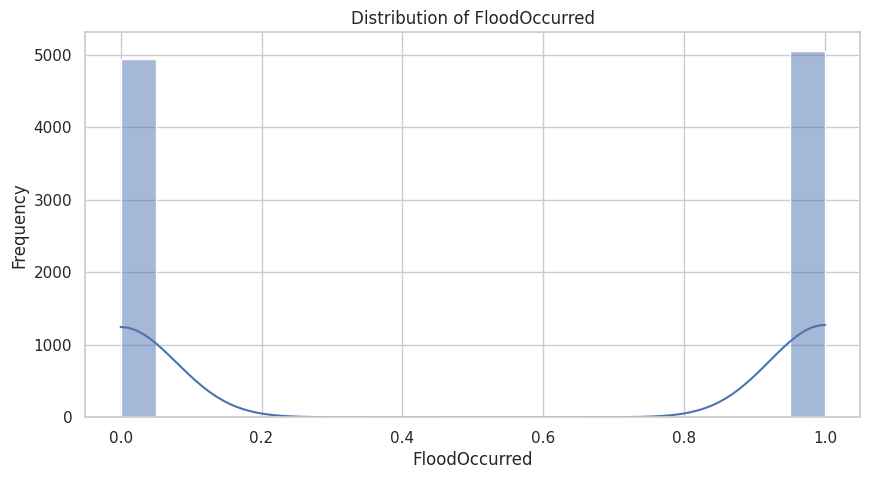

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numerics(series):
    """Function to plot histogram and density plot for a numeric column."""
    plt.figure(figsize=(10, 5))
    sns.histplot(series, bins=20, kde=True)
    plt.xlabel(series.name)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {series.name}")
    plt.show()

plt.figure(figsize=(25, 12))
plot_numerics(df['FloodOccurred'])

# plot_numerics(df[['Flood Occurred']])

In [21]:
df

,Latitude,Longitude,Rainfall(mm),Temperature,Humidity,RiverDischarge,WaterLevel,Elevation,LandCover,SoilType,PopulationDensity,Infrastructure,HistoricalFloods,FloodOccurred
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,Water Body,Clay,7276.742184,1,0,1
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,Forest,Peat,6897.736956,0,1,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,Agricultural,Loam,4361.518494,1,1,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,Desert,Sandy,6163.069701,1,1,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,Agricultural,Loam,6167.964591,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32.872024,93.434120,285.682635,37.621017,69.795616,4830.703665,5.943965,2850.197900,Agricultural,Clay,6943.559433,0,0,0
9996,34.027756,69.357605,224.347263,37.935808,38.095486,1866.199787,9.466158,3314.692947,Forest,Clay,3011.997459,1,0,0
9997,35.454530,76.807256,5.836759,23.087083,79.919607,1523.374305,9.209185,3377.296962,Desert,Clay,7149.938303,1,0,1
9998,19.527152,80.856280,120.301453,28.029593,61.680873,2036.812638,2.004644,1146.986151,Water Body,Sandy,906.031452,1,0,1


### Visualisasi Penyebaran data terjadinya banjir dari pengaruh tipe Land cover dan Soil Type

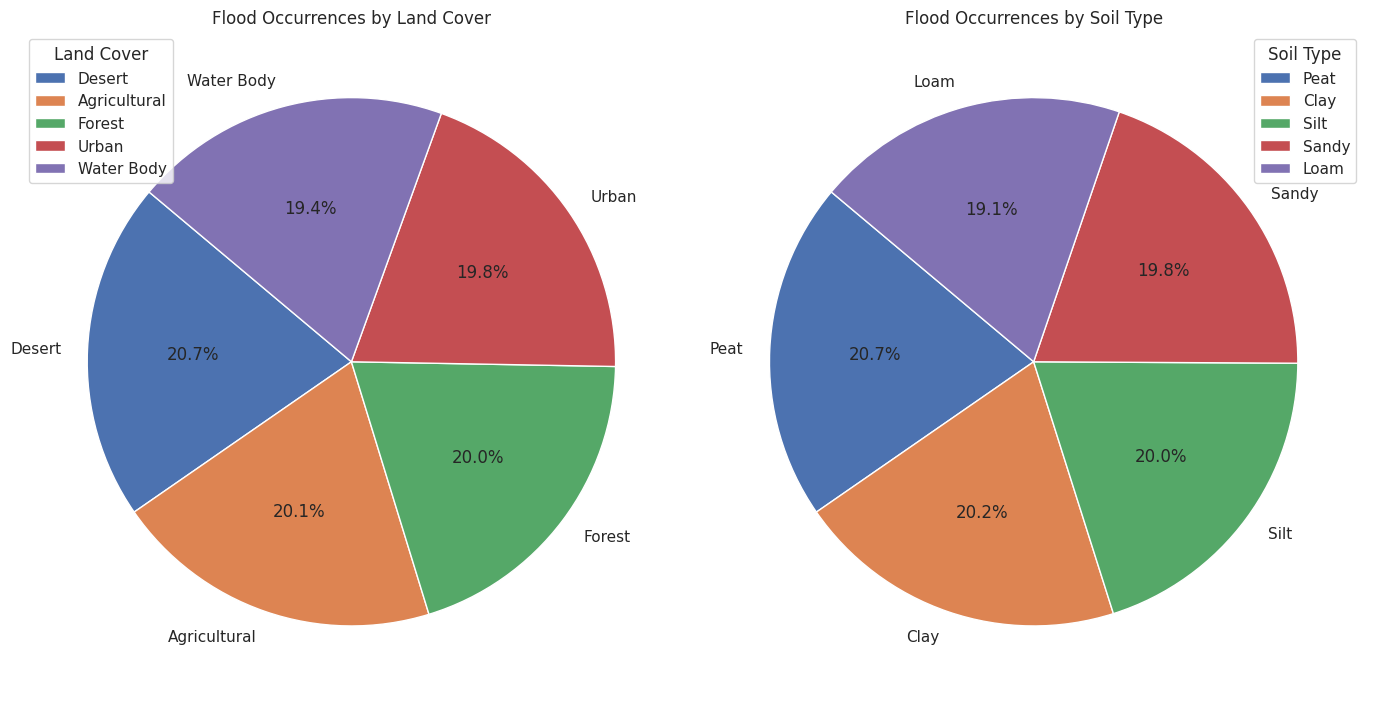

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter only flooded occurrences
flooded_df = df[df["FloodOccurred"] == 1]

# Count occurrences for land cover and soil type
land_cover_counts = flooded_df["LandCover"].value_counts()
soil_type_counts = flooded_df["SoilType"].value_counts()

# Plot pie chart for Land Cover and Soil Type with legend annotations
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for Land Cover
axes[0].pie(land_cover_counts, labels=land_cover_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title("Flood Occurrences by Land Cover")
axes[0].legend(land_cover_counts.index, title="Land Cover", loc="best")

# Pie chart for Soil Type
axes[1].pie(soil_type_counts, labels=soil_type_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title("Flood Occurrences by Soil Type")
axes[1].legend(soil_type_counts.index, title="Soil Type", loc="best")

# Show plot
plt.tight_layout()
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           10000 non-null  float64
 1   Longitude          10000 non-null  float64
 2   Rainfall(mm)       10000 non-null  float64
 3   Temperature        10000 non-null  float64
 4   Humidity           10000 non-null  float64
 5   RiverDischarge     10000 non-null  float64
 6   WaterLevel         10000 non-null  float64
 7   Elevation          10000 non-null  float64
 8   LandCover          10000 non-null  object 
 9   SoilType           10000 non-null  object 
 10  PopulationDensity  10000 non-null  float64
 11  Infrastructure     10000 non-null  int64  
 12  HistoricalFloods   10000 non-null  int64  
 13  FloodOccurred      10000 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.1+ MB


In [24]:
# def plot_numerics(series):
#     """Function to plot histogram and boxplot for a numeric column."""
#     fig, axes = plt.subplots(2, 1, figsize=(10, 8))

#     # Histogram
#     sns.histplot(series, bins=20, kde=True, ax=axes[0])
#     axes[0].set_xlabel(series.name)
#     axes[0].set_ylabel("Frequency")
#     axes[0].set_title(f"Histogram of {series.name}")

#     # Boxplot
#     sns.boxplot(x=series, ax=axes[1])
#     axes[1].set_xlabel(series.name)
#     axes[1].set_title(f"Boxplot of {series.name}")

#     plt.tight_layout()
#     plt.show()

# # Panggil fungsi untuk melihat histogram dan boxplot
# plot_numerics(df['FloodOccurred'])


In [25]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# def plot_all_numerics(df):
#     """Function to plot histogram and boxplot for all numeric columns in a dataframe."""
#     numeric_cols = df.select_dtypes(include=['number']).columns  # Ambil semua kolom numerik

#     for col in numeric_cols:
#         fig, axes = plt.subplots(2, 1, figsize=(10, 8))  # Buat subplot untuk histogram & boxplot

#         # Histogram
#         sns.histplot(df[col], bins=20, kde=True, ax=axes[0])
#         axes[0].set_xlabel(col)
#         axes[0].set_ylabel("Frequency")
#         axes[0].set_title(f"Histogram of {col}")

#         # Boxplot
#         sns.boxplot(x=df[col], ax=axes[1])
#         axes[1].set_xlabel(col)
#         axes[1].set_title(f"Boxplot of {col}")

#         plt.tight_layout()  # Supaya tidak bertumpuk
#         plt.show()

# # Panggil fungsi untuk menampilkan semua histogram dan boxplot
# plot_all_numerics(df)


# HEATMAP

In [26]:
# Mapping untuk Land_Cover
land_cover_mapping = {
    "Water Body": 5,
    "Urban": 4,
    "Agricultural": 3,
    "Forest": 2,
    "Desert": 1
}

# Mapping untuk Soil_Type
soil_type_mapping = {
    "Clay": 5,
    "Silt": 4,
    "Peat": 3,
    "Loam": 2,
    "Sandy": 1
}

# Mengubah kategori menjadi angka
df["LandCover"] = df["LandCover"].map(land_cover_mapping)
df["SoilType"] = df["SoilType"].map(soil_type_mapping)

# Simpan kembali ke CSV jika diperlukan
df.to_csv("flood_risk_dataset_encoded.csv", index=False)

# Tampilkan hasil perubahan
print(df.head())


    Latitude  Longitude  Rainfall(mm)  Temperature   Humidity  RiverDischarge  \
0  18.861663  78.835584    218.999493    34.144337  43.912963     4236.182888   
1  35.570715  77.654451     55.353599    28.778774  27.585422     2472.585219   
2  29.227824  73.108463    103.991908    43.934956  30.108738      977.328053   
3  25.361096  85.610733    198.984191    21.569354  34.453690     3683.208933   
4  12.524541  81.822101    144.626803    32.635692  36.292267     2093.390678   

   WaterLevel    Elevation  LandCover  SoilType  PopulationDensity  \
0    7.415552   377.465433          5         5        7276.742184   
1    8.811019  7330.608875          2         3        6897.736956   
2    4.631799  2205.873488          3         2        4361.518494   
3    2.891787  2512.277800          1         1        6163.069701   
4    3.188466  2001.818223          3         2        6167.964591   

   Infrastructure  HistoricalFloods  FloodOccurred  
0               1                 0    

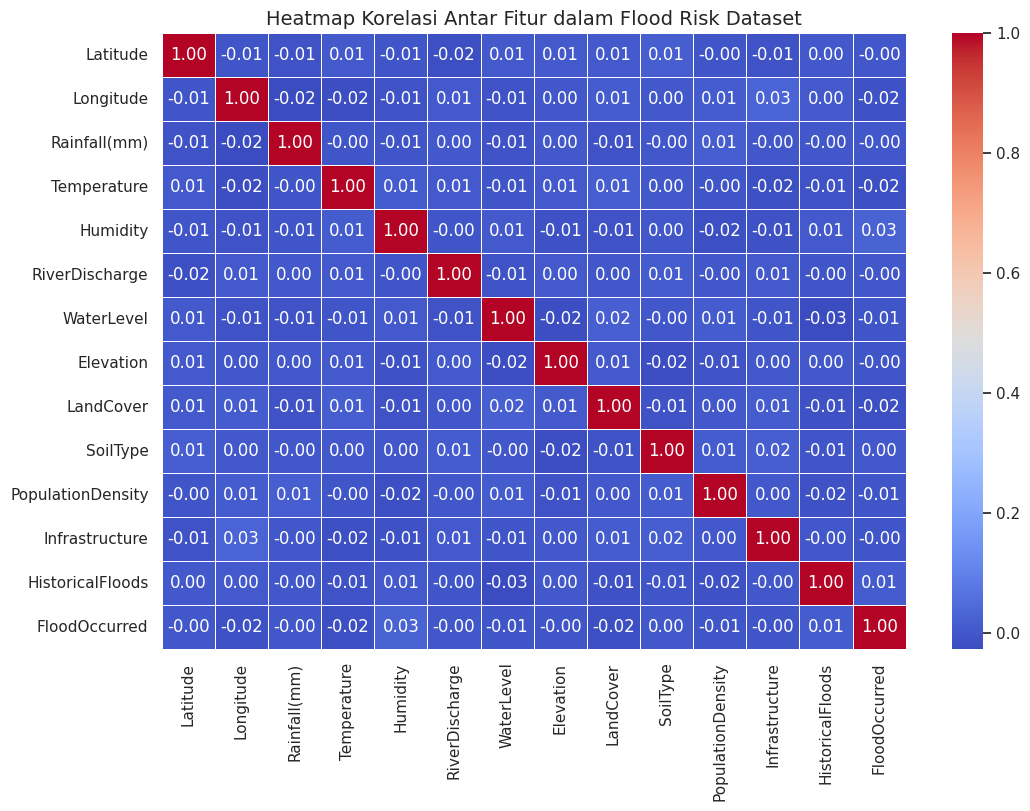

In [27]:
# Menghitung korelasi antar fitur
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Tambahkan judul
plt.title("Heatmap Korelasi Antar Fitur dalam Flood Risk Dataset", fontsize=14)

# Tampilkan heatmap
plt.show()

In [28]:
# Hitung korelasi antara semua kolom
correlation_matrix = df.corr()

# Ambil korelasi dengan kolom 'Flood_Occurred'
flood_correlation = correlation_matrix["FloodOccurred"].drop("FloodOccurred")  # Hilangkan korelasi dengan dirinya sendiri

# Urutkan berdasarkan pengaruh terbesar (absolut)
flood_correlation_sorted = flood_correlation.abs().sort_values(ascending=False)

# Ambil fitur dengan korelasi tertinggi (tidak termasuk 1.00)
print("Fitur yang paling mempengaruhi terjadinya banjir:")
print(flood_correlation_sorted)


Fitur yang paling mempengaruhi terjadinya banjir:
Humidity             0.027754
LandCover            0.017462
Temperature          0.015771
Longitude            0.015008
HistoricalFloods     0.012030
WaterLevel           0.005211
PopulationDensity    0.005007
Elevation            0.004331
Infrastructure       0.003846
SoilType             0.003746
Latitude             0.002908
Rainfall(mm)         0.002170
RiverDischarge       0.002115
Name: FloodOccurred, dtype: float64


## Pengaruh Humidity terhadap terjadinya banjir

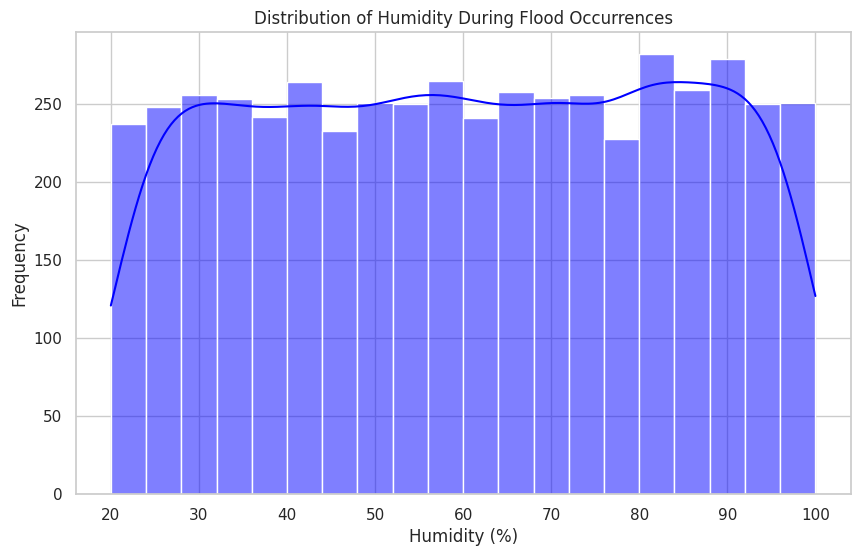

In [29]:
import seaborn as sns

# Plot histogram for humidity distribution in flooded areas
plt.figure(figsize=(10, 6))
sns.histplot(flooded_df["Humidity"], bins=20, kde=True, color='blue')

# Add labels and title
plt.xlabel("Humidity (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Humidity During Flood Occurrences")

# Show plot
plt.show()


Penjelasan Visualisasi
Histogram di atas menunjukkan distribusi kelembaban udara (Humidity (%)) saat kejadian banjir terjadi. Berikut adalah poin-poin penting dari visualisasi tersebut:

1. Sumbu X (Humidity %): Menunjukkan tingkat kelembaban udara dalam persentase.
2. Sumbu Y (Frequency): Menunjukkan jumlah kejadian banjir yang terjadi pada rentang kelembaban tertentu.
3. Kurva KDE (Kernel Density Estimation): Garis halus yang menunjukkan pola kepadatan data, membantu memahami distribusi nilai kelembaban yang sering muncul.

Analisis Data
1. Dari histogram, kita dapat melihat bahwa kejadian banjir lebih sering terjadi pada tingkat kelembaban tertentu.
2. Jika distribusi menunjukkan puncak pada kelembaban tinggi (>60-80%), ini menunjukkan bahwa banjir cenderung lebih sering terjadi di daerah dengan kelembaban tinggi.
3. Jika distribusi menyebar secara merata, maka kelembaban mungkin bukan satu-satunya faktor yang mempengaruhi kejadian banjir.

## Pengaruh Land Cover dan Soil Type terhadap Terjadinya Banjir

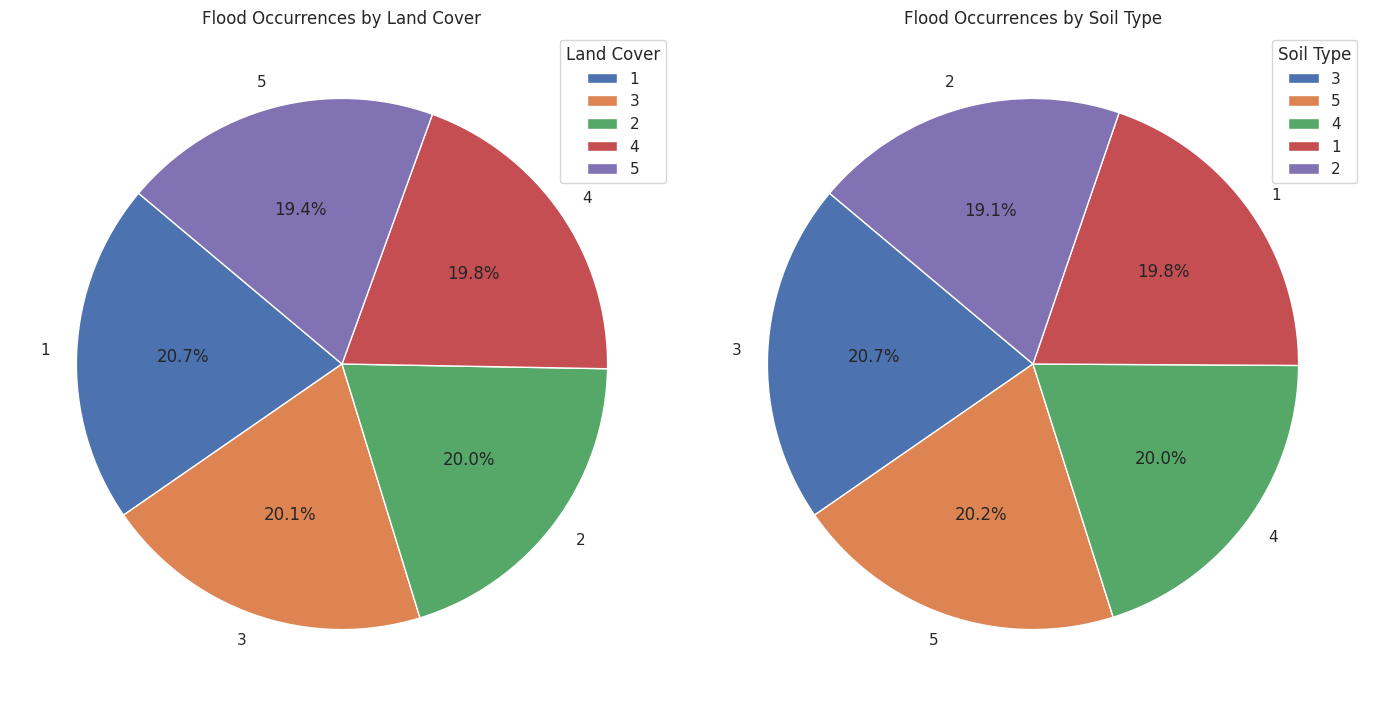

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter only flooded occurrences
flooded_df = df[df["FloodOccurred"] == 1]

# Count occurrences for land cover and soil type
land_cover_counts = flooded_df["LandCover"].value_counts()
soil_type_counts = flooded_df["SoilType"].value_counts()

# Plot pie chart for Land Cover and Soil Type with legend annotations
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for Land Cover
axes[0].pie(land_cover_counts, labels=land_cover_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title("Flood Occurrences by Land Cover")
axes[0].legend(land_cover_counts.index, title="Land Cover", loc="best")

# Pie chart for Soil Type
axes[1].pie(soil_type_counts, labels=soil_type_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title("Flood Occurrences by Soil Type")
axes[1].legend(soil_type_counts.index, title="Soil Type", loc="best")

# Show plot
plt.tight_layout()
plt.show()

land_cover_mapping = {
1. "Badan Air": 5,
2. "Perkotaan": 4,
3. "Pertanian": 3,
4. "Hutan": 2,
5. "Gurun": 1
}

Pemetaan untuk Jenis_Tanah
soil_type_mapping = {
1. "Tanah Liat": 5,
2. "Lumpur": 4,
3. "Gambut": 3,
4. "Lempung": 2,
5. "Berpasir": 1
}

### Pengaruh Soil Type (Jenis Tanah) terhadap Banjir
Tanah memiliki sifat fisik yang berbeda-beda dalam menyerap air. Berikut adalah beberapa jenis tanah yang umum dan bagaimana pengaruhnya terhadap banjir:

Clay (Lempung)

- Tanah ini memiliki partikel yang sangat kecil dan daya serap air yang rendah.
- Saat hujan deras, air sulit meresap dan cenderung mengalir di permukaan, meningkatkan risiko banjir.
- Biasanya ditemukan di daerah dataran rendah dan lembah sungai.

Loam (Lempung Berpasir)

- Tanah campuran pasir, debu, dan lempung dengan kapasitas serapan air yang baik.
- Dapat membantu mengurangi risiko banjir karena kemampuannya menyerap dan menyimpan air dengan lebih baik.

Sandy (Pasir)

- Tanah dengan partikel besar yang memiliki daya serap tinggi.
- Risiko banjir lebih rendah karena air cepat meresap ke dalam tanah.
- Namun, di daerah pantai atau gurun, banjir bandang masih bisa terjadi jika tanah sudah jenuh air.

Peat (Gambut)

- Tanah organik yang menyimpan banyak air, tetapi dapat menjadi jenuh dengan cepat.
- Risiko banjir tinggi terutama saat hujan deras yang berkepanjangan.

Silt (Lanau)
- Tanah dengan partikel yang lebih halus dari pasir tetapi lebih kasar dari lempung (clay).
- Dapat menahan lebih banyak air dibandingkan pasir, tetapi tetap memiliki daya serap yang lebih baik dibandingkan tanah liat.
- Saat basah, silt bisa menjadi sangat licin dan mudah terbawa aliran air, meningkatkan kemungkinan sedimentasi di sungai yang bisa menyebabkan pendangkalan dan banjir.
- Biasanya ditemukan di daerah dataran banjir dan sepanjang sungai.

Kesimpulan dari Soil Type
1. Tanah lempung (Clay) menyebabkan genangan karena daya serap rendah.
2. Tanah gambut (Peat) dapat menyerap banyak air tetapi cepat jenuh.
3. Tanah pasir (Sandy) memiliki daya serap tinggi dan lebih jarang menyebabkan banjir.
4. Tanah lempung berpasir (Loam) seimbang antara serapan dan drainase, cocok untuk pertanian.
5. Tanah lanau (Silt) mudah terbawa aliran air dan dapat menyebabkan sedimentasi sungai yang berkontribusi pada banjir jangka panjang.


### Pengaruh Land Cover (Penutupan Lahan) terhadap Banjir
Land cover menentukan bagaimana air hujan berinteraksi dengan permukaan tanah. Berikut beberapa jenis land cover yang umum dan dampaknya terhadap banjir:

Water Body (Perairan: Sungai, Danau, Lautan)

- Jika air hujan masuk ke perairan yang sudah meluap, risiko banjir meningkat.
- Sungai yang meluap akibat curah hujan tinggi dapat menyebabkan banjir bandang.

Forest (Hutan)

- Hutan berfungsi sebagai penyerap air alami melalui akar pohon yang menyimpan air hujan dan memperlambat aliran permukaan.
- Risiko banjir lebih rendah di daerah berhutan lebat.

Agricultural (Lahan Pertanian)

- Bergantung pada jenis tanaman dan sistem irigasi.
- Pertanian intensif tanpa sistem drainase yang baik dapat menyebabkan genangan dan meningkatkan risiko banjir.

Urban/Infrastructure (Kota dan Infrastruktur)

- Daerah perkotaan dengan jalan beraspal dan beton memiliki daya serap air yang sangat rendah.
- Air hujan cenderung mengalir ke saluran pembuangan atau langsung ke sungai, meningkatkan kemungkinan banjir jika sistem drainase tidak memadai.

Desert (Gurun/Pasir)

- Biasanya memiliki daya serap tinggi, tetapi curah hujan rendah.
- Namun, hujan deras yang tiba-tiba dapat menyebabkan banjir bandang karena tanah kering tidak dapat menyerap air dengan cukup cepat.

Kesimpulan dari Land Cover
1. Daerah berhutan (Forest) memiliki risiko banjir yang lebih rendah karena pohon dan vegetasi mampu menyerap air dan memperlambat aliran permukaan.
2. Daerah perairan (Water Body) berisiko tinggi mengalami banjir jika volume air meluap, terutama di sekitar sungai dan danau yang menerima curah hujan tinggi.
3. Lahan pertanian (Agricultural) dapat meningkatkan atau mengurangi risiko banjir, tergantung pada jenis tanaman dan sistem drainase yang digunakan.
4. Daerah perkotaan (Urban/Infrastructure) memiliki risiko banjir lebih tinggi karena permukaan yang tidak dapat menyerap air seperti aspal dan beton menyebabkan aliran air cepat menuju sistem drainase, yang bisa meluap jika tidak memadai.
5. Wilayah gurun (Desert) umumnya memiliki daya serap air yang tinggi, tetapi tetap rentan terhadap banjir bandang, terutama saat hujan deras karena tanah kering sulit menyerap air dengan cepat.





## Pengaruh RainFall(mm) terhadap terjadinya banjir

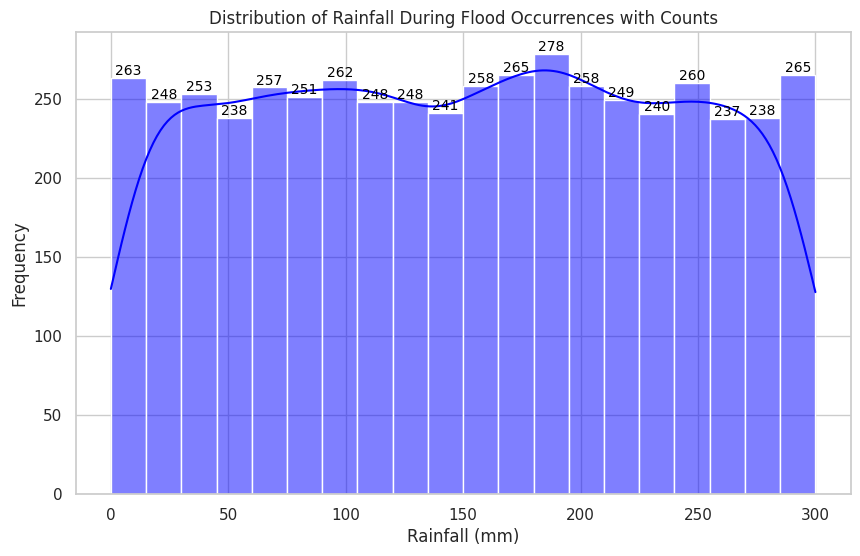

In [31]:
# Create histogram with count labels
plt.figure(figsize=(10, 6))
ax = sns.histplot(flooded_df["Rainfall(mm)"], bins=20, kde=True, color='blue')

# Add labels on each bar
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Only label bars with data
        plt.text(patch.get_x() + patch.get_width() / 2, height, int(height),
                 ha='center', va='bottom', fontsize=10, color='black')

# Add labels and title
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.title("Distribution of Rainfall During Flood Occurrences with Counts")

# Show plot
plt.show()


Rentang curah hujan (Rainfall (mm)) yang menyebabkan kejadian banjir tertinggi adalah 179.99 mm - 194.99 mm, dengan total 278 kejadian banjir dalam rentang tersebut. Ini menunjukkan bahwa curah hujan dalam kisaran ini merupakan faktor utama dalam menyebabkan banjir di dataset yang dianalisis. Jika Anda ingin analisis lebih lanjut, seperti hubungan curah hujan dengan faktor lain, beri tahu saya! 🚀 ​

## Pengaruh Water Level(m) terhadap terjadinya banjir

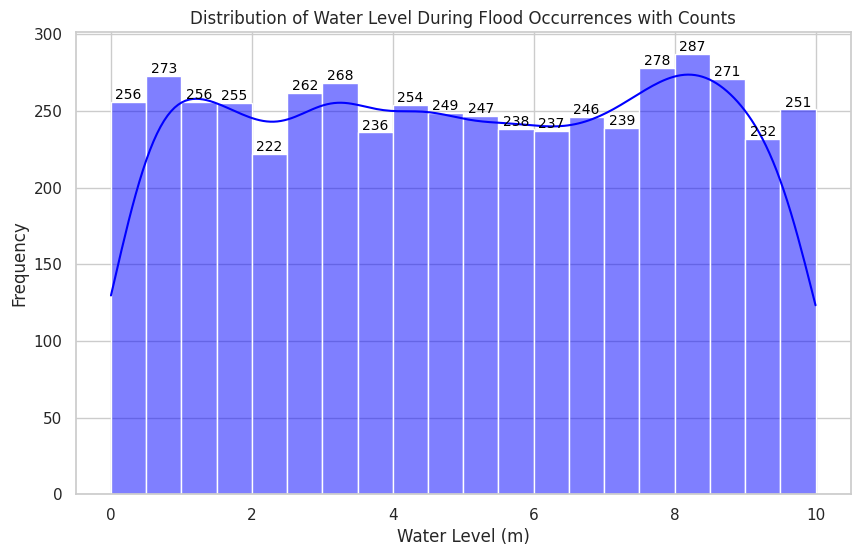

In [32]:
# Plot histogram for water level distribution in flooded areas
plt.figure(figsize=(10, 6))
ax = sns.histplot(flooded_df["WaterLevel"], bins=20, kde=True, color='blue')

# Add labels on each bar
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Only label bars with data
        plt.text(patch.get_x() + patch.get_width() / 2, height, int(height),
                 ha='center', va='bottom', fontsize=10, color='black')

# Add labels and title
plt.xlabel("Water Level (m)")
plt.ylabel("Frequency")
plt.title("Distribution of Water Level During Flood Occurrences with Counts")

# Show plot
plt.show()


Analisis Data Water Level saat Kejadian Banjir
Dari dataset kejadian banjir, berikut adalah hasil analisis statistik terkait ketinggian air (Water Level (m)):

1. Minimum Water Level (m): 0.0027 m

Ini menunjukkan bahwa ada kejadian banjir bahkan pada ketinggian air yang sangat rendah, kemungkinan besar akibat faktor lain seperti curah hujan tinggi atau drainase yang buruk.

2. Maksimum Water Level (m): 9.9969 m

Ketinggian air tertinggi yang tercatat selama banjir hampir mencapai 10 meter, yang menandakan kondisi banjir yang sangat parah, mungkin terjadi di daerah dataran rendah atau dekat sungai besar.

3. Rata-rata Water Level (m): 5.0031 m

Secara rata-rata, banjir terjadi ketika ketinggian air mencapai sekitar 5 meter.

4. Median Water Level (m): 4.9914 m

Nilai median menunjukkan bahwa separuh dari kejadian banjir terjadi pada ketinggian air di bawah 4.99 meter, sementara separuh lainnya terjadi di atas angka ini.

5. Rentang Water Level yang Paling Sering Menyebabkan Banjir: 7.9981 m – 8.4978 m

Rentang ketinggian air ini adalah yang paling sering dikaitkan dengan kejadian banjir.

6. Jumlah Kejadian Banjir pada Rentang Tersebut: 287 kali

Sebanyak 287 kejadian banjir terjadi ketika Water Level berada dalam rentang 7.998 m – 8.498 m, menunjukkan bahwa ini adalah ambang batas kritis di mana banjir lebih sering terjadi.

In [33]:
df

,Latitude,Longitude,Rainfall(mm),Temperature,Humidity,RiverDischarge,WaterLevel,Elevation,LandCover,SoilType,PopulationDensity,Infrastructure,HistoricalFloods,FloodOccurred
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,5,5,7276.742184,1,0,1
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,2,3,6897.736956,0,1,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,3,2,4361.518494,1,1,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,1,1,6163.069701,1,1,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,3,2,6167.964591,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32.872024,93.434120,285.682635,37.621017,69.795616,4830.703665,5.943965,2850.197900,3,5,6943.559433,0,0,0
9996,34.027756,69.357605,224.347263,37.935808,38.095486,1866.199787,9.466158,3314.692947,2,5,3011.997459,1,0,0
9997,35.454530,76.807256,5.836759,23.087083,79.919607,1523.374305,9.209185,3377.296962,1,5,7149.938303,1,0,1
9998,19.527152,80.856280,120.301453,28.029593,61.680873,2036.812638,2.004644,1146.986151,5,1,906.031452,1,0,1


In [34]:
df.describe().T



,count,mean,std,min,25%,50%,75%,max
Latitude,10000.0,22.330627,8.341274,8.000337,15.143537,22.283330,29.460184,36.991813
Longitude,10000.0,82.631366,8.389542,68.004575,75.364428,82.671007,89.937897,96.997820
Rainfall(mm),10000.0,150.015118,86.032127,0.014437,76.124373,150.620428,223.402156,299.970293
Temperature,10000.0,29.961401,8.669838,15.000166,22.405717,30.000907,37.413488,44.993681
Humidity,10000.0,59.749104,23.142734,20.001339,39.541778,59.497375,80.038163,99.997772
RiverDischarge,10000.0,2515.722946,1441.706442,0.042161,1284.782376,2530.451944,3767.229862,4999.698480
WaterLevel,10000.0,5.017881,2.876579,0.002701,2.538847,5.042094,7.524692,9.996899
Elevation,10000.0,4417.138177,2530.245421,1.150340,2229.681903,4417.199761,6616.729066,8846.894877
LandCover,10000.0,2.995900,1.423406,1.000000,2.000000,3.000000,4.000000,5.000000
SoilType,10000.0,3.012000,1.405152,1.000000,2.000000,3.000000,4.000000,5.000000


# PREPROCESSING
# Data Cleaning
## 1. Null Values

In [35]:
df.isnull().sum()

,0
Latitude,0
Longitude,0
Rainfall(mm),0
Temperature,0
Humidity,0
RiverDischarge,0
WaterLevel,0
Elevation,0
LandCover,0
SoilType,0


## 2. DUPLICATES

In [36]:
df.duplicated().sum()

0

## 3. INSIGHT

In [37]:
# Helper function to print unique values and their counts for specific columns
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

# Specify the columns you want to analyze
specific_columns = ['WaterLevel','Rainfall(mm)','Infrastructure', 'HistoricalFloods', 'FloodOccurred']  # Ganti dengan nama kolom yang relevan

# Calling the function for the selected columns
unique_values(df, specific_columns)


Column: WaterLevel
------------------------------
Unique Values (10000): [7.41555203 8.81101875 4.63179875 ... 9.209185   2.00464359 0.99185609]

Value Counts:
WaterLevel
7.415552    1
6.435911    1
3.334490    1
8.401739    1
8.113979    1
           ..
4.765576    1
7.908025    1
1.469975    1
1.570543    1
0.991856    1
Name: count, Length: 10000, dtype: int64

Column: Rainfall(mm)
------------------------------
Unique Values (10000): [218.9994933   55.35359868 103.99190831 ...   5.83675884 120.30145275
  77.21939372]

Value Counts:
Rainfall(mm)
218.999493    1
2.201288      1
197.152952    1
125.685869    1
142.511313    1
             ..
153.063961    1
290.780773    1
286.709868    1
123.728847    1
77.219394     1
Name: count, Length: 10000, dtype: int64

Column: Infrastructure
------------------------------
Unique Values (2): [1 0]

Value Counts:
Infrastructure
1    5020
0    4980
Name: count, dtype: int64

Column: HistoricalFloods
------------------------------
Unique Values (

## 4. Outliers

In [38]:
df.shape

(10000, 14)

In [39]:
# plt.figure(figsize=(20, 40))
# df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
# plt.show()

In [40]:
df

,Latitude,Longitude,Rainfall(mm),Temperature,Humidity,RiverDischarge,WaterLevel,Elevation,LandCover,SoilType,PopulationDensity,Infrastructure,HistoricalFloods,FloodOccurred
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,5,5,7276.742184,1,0,1
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,2,3,6897.736956,0,1,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,3,2,4361.518494,1,1,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,1,1,6163.069701,1,1,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,3,2,6167.964591,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32.872024,93.434120,285.682635,37.621017,69.795616,4830.703665,5.943965,2850.197900,3,5,6943.559433,0,0,0
9996,34.027756,69.357605,224.347263,37.935808,38.095486,1866.199787,9.466158,3314.692947,2,5,3011.997459,1,0,0
9997,35.454530,76.807256,5.836759,23.087083,79.919607,1523.374305,9.209185,3377.296962,1,5,7149.938303,1,0,1
9998,19.527152,80.856280,120.301453,28.029593,61.680873,2036.812638,2.004644,1146.986151,5,1,906.031452,1,0,1


# Getting Insight| Visualisasi


In [41]:
# df.info()
df

,Latitude,Longitude,Rainfall(mm),Temperature,Humidity,RiverDischarge,WaterLevel,Elevation,LandCover,SoilType,PopulationDensity,Infrastructure,HistoricalFloods,FloodOccurred
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,5,5,7276.742184,1,0,1
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,2,3,6897.736956,0,1,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,3,2,4361.518494,1,1,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,1,1,6163.069701,1,1,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,3,2,6167.964591,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32.872024,93.434120,285.682635,37.621017,69.795616,4830.703665,5.943965,2850.197900,3,5,6943.559433,0,0,0
9996,34.027756,69.357605,224.347263,37.935808,38.095486,1866.199787,9.466158,3314.692947,2,5,3011.997459,1,0,0
9997,35.454530,76.807256,5.836759,23.087083,79.919607,1523.374305,9.209185,3377.296962,1,5,7149.938303,1,0,1
9998,19.527152,80.856280,120.301453,28.029593,61.680873,2036.812638,2.004644,1146.986151,5,1,906.031452,1,0,1


In [42]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(16,4))
# sns.countplot(x='FloodOccurred',data=df,hue='WaterLevel')
# plt.xticks(rotation=45)
# plt.title('Flood Occurred over Water Level',fontdict={'fontsize':16})
# plt.show()

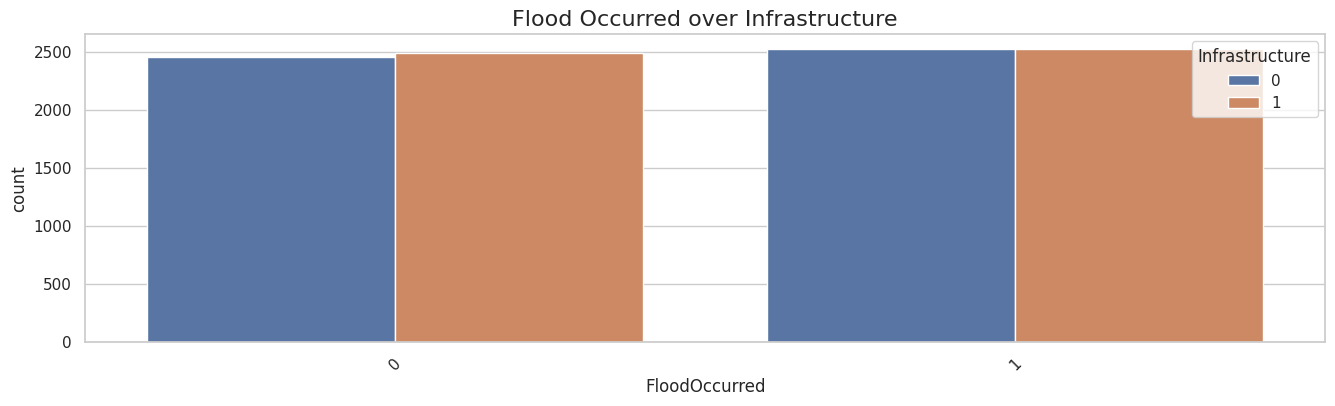

In [43]:
plt.figure(figsize=(16,4))
sns.countplot(x='FloodOccurred',data=df,hue='Infrastructure')
plt.xticks(rotation=45)
plt.title('Flood Occurred over Infrastructure',fontdict={'fontsize':16})
plt.show()

Infrastruktur (Infrastructure): Indikator keberadaan infrastruktur pengendalian banjir

0 = Tidak
1 = Iya

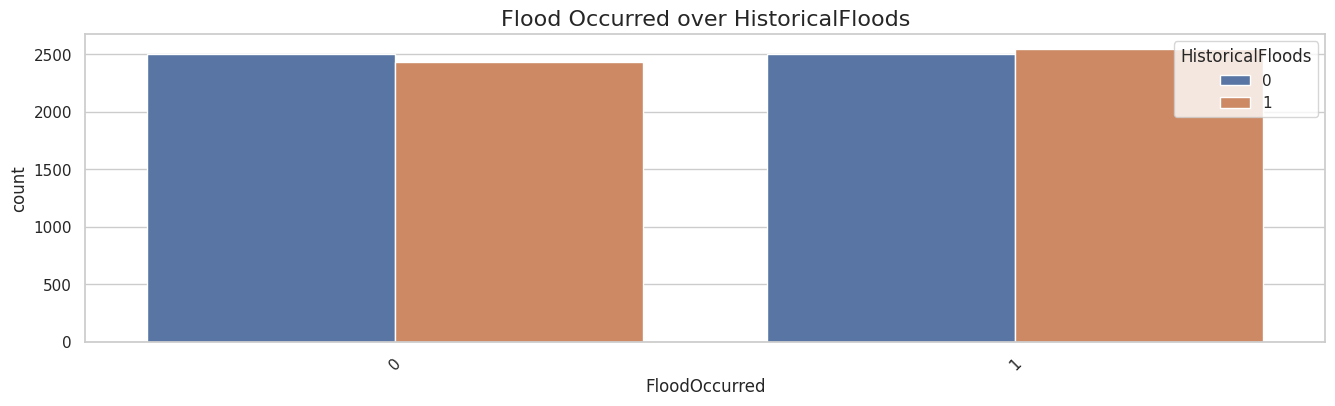

In [44]:
plt.figure(figsize=(16,4))
sns.countplot(x='FloodOccurred',data=df,hue='HistoricalFloods')
plt.xticks(rotation=45)
plt.title('Flood Occurred over HistoricalFloods',fontdict={'fontsize':16})
plt.show()

Banjir Historis (Historical_Floods): Indikator kejadian banjir historis (0 untuk tidak, 1 untuk ya).

In [45]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Visualisasi 1: Scatter Plot
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='Rainfall(mm)', y='FloodOccurred', data=df)
# plt.title('Pengaruh Curah Hujan terhadap Kejadian Banjir (Scatter Plot)')
# plt.xlabel('Curah Hujan (mm)')
# plt.ylabel('Kejadian Banjir (0/1)')
# plt.show()

# # Visualisasi 2: Box Plot
# plt.figure(figsize=(8, 6))
# sns.boxplot(x='FloodOccurred', y='Rainfall(mm)', data=df)
# plt.title('Pengaruh Curah Hujan terhadap Kejadian Banjir (Box Plot)')
# plt.xlabel('Kejadian Banjir (0/1)')
# plt.ylabel('Curah Hujan (mm)')
# plt.show()

# # Visualisasi 3: Violin Plot
# plt.figure(figsize=(8, 6))
# sns.violinplot(x='FloodOccurred', y='Rainfall(mm)', data=df)
# plt.title('Pengaruh Curah Hujan terhadap Kejadian Banjir (Violin Plot)')
# plt.xlabel('Kejadian Banjir (0/1)')
# plt.ylabel('Curah Hujan (mm)')
# plt.show()

In [46]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Filter data untuk FloodOccurred = 1 (banjir terjadi) dan Rainfall(mm) > nilai tertentu
# nilai_cutoff = 50  # Ganti dengan nilai yang diinginkan
# flood_data = df[(df['FloodOccurred'] == 1) & (df['Rainfall(mm)'] > nilai_cutoff)]

# # Buat histogram
# plt.figure(figsize=(10, 6))
# sns.histplot(flood_data['Rainfall(mm)'], bins=20, kde=True)

# plt.title(f'Distribusi Curah Hujan Saat Banjir Terjadi (Curah Hujan > {nilai_cutoff} mm)')
# plt.xlabel('Curah Hujan (mm)')
# plt.ylabel('Frekuensi')
# plt.show()

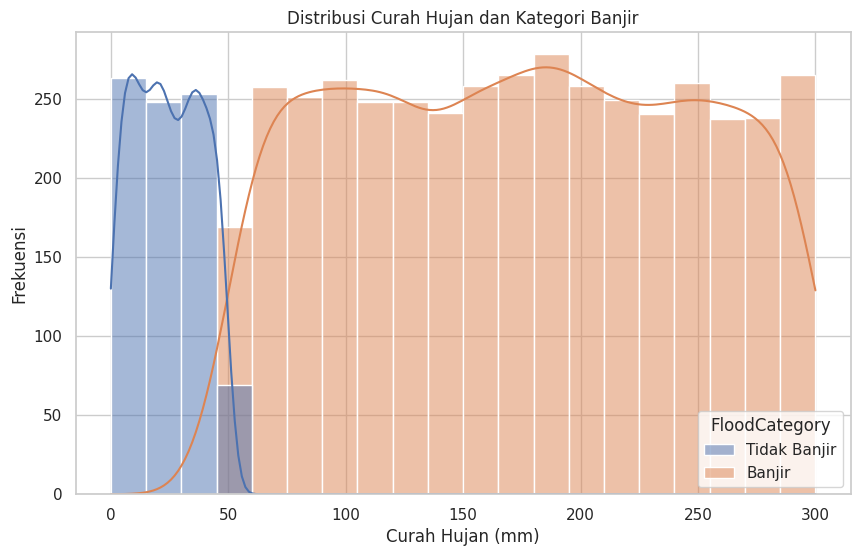

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the rainfall threshold for flooding (you can adjust this)
nilai_cutoff = 50

# Create a new column 'FloodCategory' based on rainfall and FloodOccurred
df['FloodCategory'] = pd.cut(df['Rainfall(mm)'],
                             bins=[-float('inf'), nilai_cutoff, float('inf')],
                             labels=['Tidak Banjir', 'Banjir'],
                             right=False)  # right=False to include the cutoff in 'Banjir'

# Filter data for flood occurrences (FloodOccurred == 1)
flood_data = df[df['FloodOccurred'] == 1]

# Create the histogram with hue based on FloodCategory
plt.figure(figsize=(10, 6))
sns.histplot(data=flood_data, x='Rainfall(mm)', hue='FloodCategory', bins=20, kde=True)

plt.title('Distribusi Curah Hujan dan Kategori Banjir')
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('Frekuensi')
plt.show()

In [48]:
df

,Latitude,Longitude,Rainfall(mm),Temperature,Humidity,RiverDischarge,WaterLevel,Elevation,LandCover,SoilType,PopulationDensity,Infrastructure,HistoricalFloods,FloodOccurred,FloodCategory
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,5,5,7276.742184,1,0,1,Banjir
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,2,3,6897.736956,0,1,0,Banjir
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,3,2,4361.518494,1,1,1,Banjir
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,1,1,6163.069701,1,1,0,Banjir
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,3,2,6167.964591,1,0,0,Banjir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32.872024,93.434120,285.682635,37.621017,69.795616,4830.703665,5.943965,2850.197900,3,5,6943.559433,0,0,0,Banjir
9996,34.027756,69.357605,224.347263,37.935808,38.095486,1866.199787,9.466158,3314.692947,2,5,3011.997459,1,0,0,Banjir
9997,35.454530,76.807256,5.836759,23.087083,79.919607,1523.374305,9.209185,3377.296962,1,5,7149.938303,1,0,1,Tidak Banjir
9998,19.527152,80.856280,120.301453,28.029593,61.680873,2036.812638,2.004644,1146.986151,5,1,906.031452,1,0,1,Banjir


### Memberikan flag untuk kondisi Land dan Soil

In [49]:
# Mapping untuk keterangan kondisi lahan dan tanah
land_flag_mapping = {
    5: "Water Body",
    4: "Urban",
    3: "Agricultural",
    2: "Forest",
    1: "Desert"
}

soil_flag_mapping = {
    5: "Clay",
    4: "Silt",
    3: "Peaty",
    2: "Loam",
    1: "Sandy"
}

# Menambahkan kolom 'land_flag' berdasarkan 'LandCover'
if "LandCover" in df.columns:
    df["land_flag"] = df["LandCover"].map(land_flag_mapping)
else:
    print("Kolom 'LandCover' tidak ditemukan dalam dataset.")

# Menambahkan kolom 'soil_flag' berdasarkan 'SoilType'
if "SoilType" in df.columns:
    df["soil_flag"] = df["SoilType"].map(soil_flag_mapping)
else:
    print("Kolom 'SoilType' tidak ditemukan dalam dataset.")

In [50]:
df

,Latitude,Longitude,Rainfall(mm),Temperature,Humidity,RiverDischarge,WaterLevel,Elevation,LandCover,SoilType,PopulationDensity,Infrastructure,HistoricalFloods,FloodOccurred,FloodCategory,land_flag,soil_flag
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,5,5,7276.742184,1,0,1,Banjir,Water Body,Clay
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,2,3,6897.736956,0,1,0,Banjir,Forest,Peaty
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,3,2,4361.518494,1,1,1,Banjir,Agricultural,Loam
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,1,1,6163.069701,1,1,0,Banjir,Desert,Sandy
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,3,2,6167.964591,1,0,0,Banjir,Agricultural,Loam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32.872024,93.434120,285.682635,37.621017,69.795616,4830.703665,5.943965,2850.197900,3,5,6943.559433,0,0,0,Banjir,Agricultural,Clay
9996,34.027756,69.357605,224.347263,37.935808,38.095486,1866.199787,9.466158,3314.692947,2,5,3011.997459,1,0,0,Banjir,Forest,Clay
9997,35.454530,76.807256,5.836759,23.087083,79.919607,1523.374305,9.209185,3377.296962,1,5,7149.938303,1,0,1,Tidak Banjir,Desert,Clay
9998,19.527152,80.856280,120.301453,28.029593,61.680873,2036.812638,2.004644,1146.986151,5,1,906.031452,1,0,1,Banjir,Water Body,Sandy


### Download File

In [51]:
# from google.colab import files

# # Simpan DataFrame ke file CSV
# df.to_csv("exported_data.csv", index=False)

# # Download file ke komputer
# files.download("exported_data.csv")

# Feature Engineering

In [52]:
# Import ulang library yang diperlukan
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Salin dataset asli agar tidak mengubah data mentah
df_fe = df.copy()

# Label Encoding untuk fitur kategorikal ordinal
label_enc_cols = ["LandCover", "SoilType"]
le = LabelEncoder()
for col in label_enc_cols:
    df_fe[col] = le.fit_transform(df_fe[col])

# Feature Interaction
df_fe["Rainfall_Humidity"] = df_fe["Rainfall(mm)"] * df_fe["Humidity"]
df_fe["Rainfall_RiverDischarge"] = df_fe["Rainfall(mm)"] * df_fe["RiverDischarge"]
df_fe["Rainfall_Elevation"] = df_fe["Rainfall(mm)"] / (df_fe["Elevation"] + 1)
df_fe["Population_Infrastructure"] = df_fe["PopulationDensity"] * df_fe["Infrastructure"]

# Transformasi log untuk data yang skewed
for col in ["PopulationDensity", "RiverDischarge", "WaterLevel", "Elevation"]:
    df_fe[f"Log_{col}"] = np.log1p(df_fe[col])

# Fitur baru yang menggambarkan risiko banjir
df_fe["Flood_Vulnerability_Index"] = (
    df_fe["Rainfall(mm)"] * 0.4 +
    df_fe["Humidity"] * 0.2 +
    df_fe["WaterLevel"] * 0.2 +
    df_fe["RiverDischarge"] * 0.1 -
    df_fe["Elevation"] * 0.1
)

# Risiko Infrastruktur terhadap populasi
df_fe["Infrastructure_Risk"] = df_fe["Infrastructure"] * df_fe["PopulationDensity"]

# Peluang banjir berdasarkan kejadian historis
df_fe["Historical_Flood_Risk"] = df_fe["HistoricalFloods"] * df_fe["FloodOccurred"]

# Mengembalikan kolom 'land_flag' dan 'soil_flag' tanpa perubahan
df_fe["land_flag"] = df["land_flag"]
df_fe["soil_flag"] = df["soil_flag"]

df_fe



,Latitude,Longitude,Rainfall(mm),Temperature,Humidity,RiverDischarge,WaterLevel,Elevation,LandCover,SoilType,...,Rainfall_RiverDischarge,Rainfall_Elevation,Population_Infrastructure,Log_PopulationDensity,Log_RiverDischarge,Log_WaterLevel,Log_Elevation,Flood_Vulnerability_Index,Infrastructure_Risk,Historical_Flood_Risk
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,4,4,...,9.277219e+05,0.578651,7276.742184,8.892576,8.351654,2.130081,5.936125,483.737246,7276.742184,0
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,1,2,...,1.368665e+05,0.007550,0.000000,8.839094,7.813424,2.283506,8.899950,-456.381638,0.000000,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,2,1,...,1.016342e+05,0.047122,4361.518494,8.380805,6.885845,1.728429,7.699332,-74.309673,4361.518494,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,0,0,...,7.329004e+05,0.079173,6163.069701,8.726493,8.211811,1.358869,7.829343,204.155885,6163.069701,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,2,1,...,3.027604e+05,0.072212,6167.964591,8.727286,7.647018,1.432334,7.602311,74.904113,6167.964591,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32.872024,93.434120,285.682635,37.621017,69.795616,4830.703665,5.943965,2850.197900,2,4,...,1.380048e+06,0.100197,0.000000,8.845714,8.482954,1.937873,7.955495,327.471547,0.000000,0
9996,34.027756,69.357605,224.347263,37.935808,38.095486,1866.199787,9.466158,3314.692947,1,4,...,4.186768e+05,0.067662,3011.997459,8.010691,7.532195,2.348147,8.106422,-45.598082,3011.997459,0
9997,35.454530,76.807256,5.836759,23.087083,79.919607,1523.374305,9.209185,3377.296962,0,4,...,8.891568e+03,0.001728,7149.938303,8.874999,7.329339,2.323288,8.125127,-165.231804,7149.938303,0
9998,19.527152,80.856280,120.301453,28.029593,61.680873,2036.812638,2.004644,1146.986151,4,0,...,2.450315e+05,0.104793,906.031452,6.810177,7.619632,1.100159,7.045765,149.840333,906.031452,0


## Penjelasan feature Engineering

# 1. Encoding Variabel Kategorikal
- Fitur yang dikonversi: LandCover dan SoilType
- Metode: Label Encoding
- Penjelasan: Label Encoding mengubah kategori menjadi angka.


# 2. Feature Interaction

a. Rainfall_Humidity
- Formula:

 df_fe["Rainfall_Humidity"] = df_fe["Rainfall(mm)"] * df_fe["Humidity"]

- Alasan: Kombinasi curah hujan tinggi dan kelembapan tinggi meningkatkan risiko banjir.

b. Rainfall_RiverDischarge
- Formula:

 df_fe["Rainfall_RiverDischarge"] = df_fe["Rainfall(mm)"] * df_fe["RiverDischarge"]

- Alasan: Curah hujan tinggi dan debit sungai besar dapat meningkatkan kemungkinan banjir.

c. Rainfall_Elevation
- Formula:

 df_fe["Rainfall_Elevation"] = df_fe["Rainfall(mm)"] / (df_fe["Elevation"] + 1)

- Alasan: Daerah dengan elevasi rendah lebih rentan terkena banjir.

d. Population_Infrastructure
- Formula:

 df_fe["Population_Infrastructure"] = df_fe["PopulationDensity"] * df_fe["Infrastructure"]

- Alasan: Daerah dengan populasi padat tetapi infrastruktur rendah bisa lebih terdampak banjir.

# 3. Transformasi Logaritmik
Fitur yang ditransformasi: PopulationDensity, RiverDischarge, WaterLevel, Elevation
Formula:

 Log_Feature = log(Feature+1)

**Tujuan: Mengurangi skewness agar distribusi data lebih normal.


# 4. Fitur Baru

a. Flood Vulnerability Index

- Formula:

 Flood_Vulnerability_Index
=
(
0.4
×
Rainfall
)
+
(
0.2
×
Humidity
)
+
(
0.2
×
WaterLevel
)
+
(
0.1
×
RiverDischarge
)
−
(
0.1
×
Elevation
)

Tujuan: Menggabungkan berbagai faktor risiko banjir menjadi satu indeks.

b. Infrastructure Risk

- Formula:

Infrastructure_Risk
=
Infrastructure
×
PopulationDensity

Tujuan: Mengukur risiko infrastruktur terhadap populasi di daerah yang terkena banjir.

c. Historical Flood Risk

- Formula:

Historical_Flood_Risk
=
HistoricalFloods
×
FloodOccurred



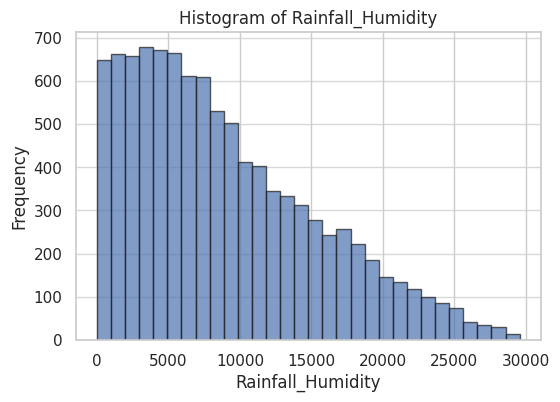

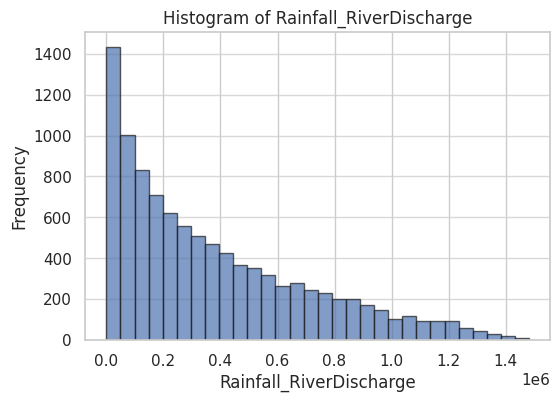

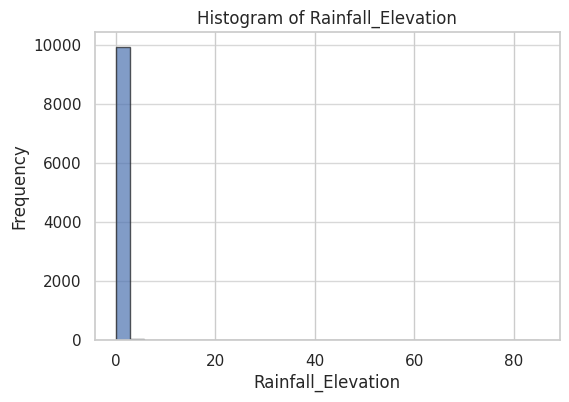

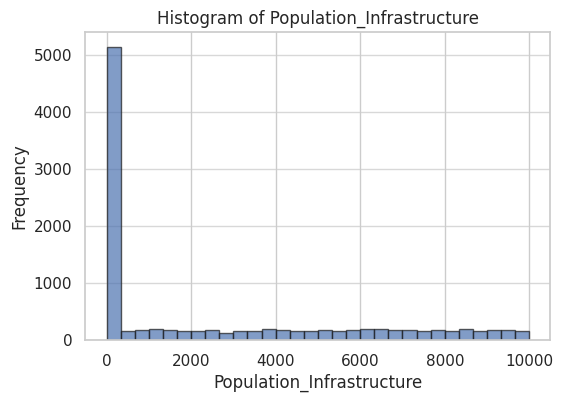

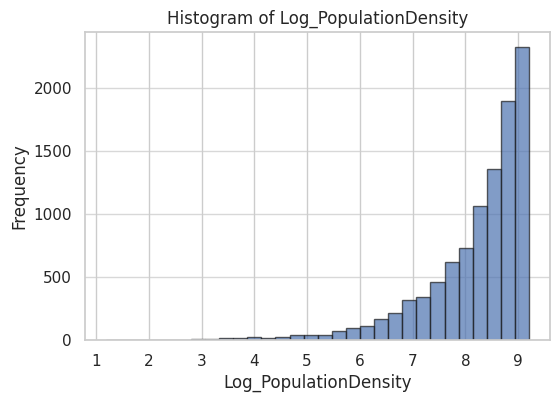

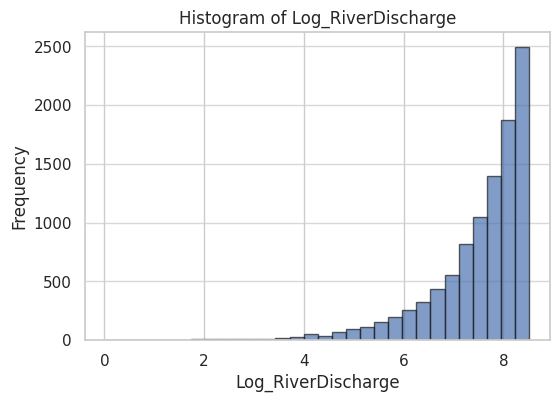

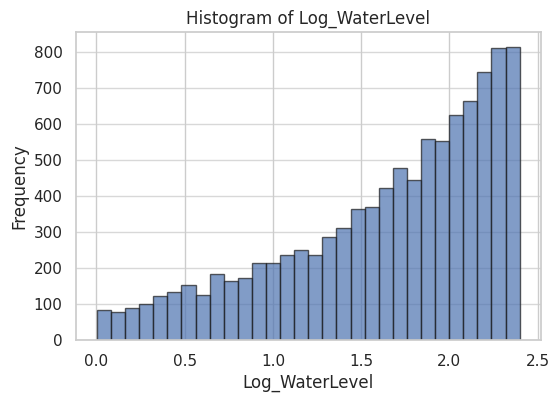

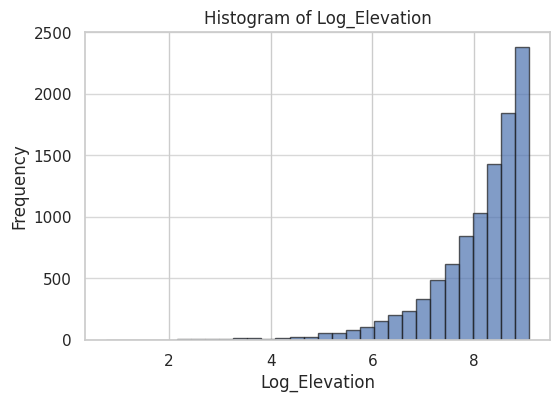

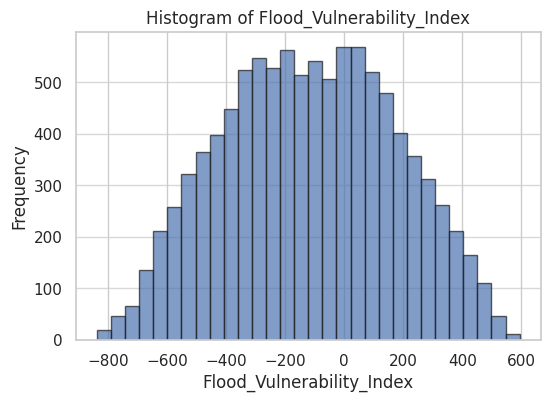

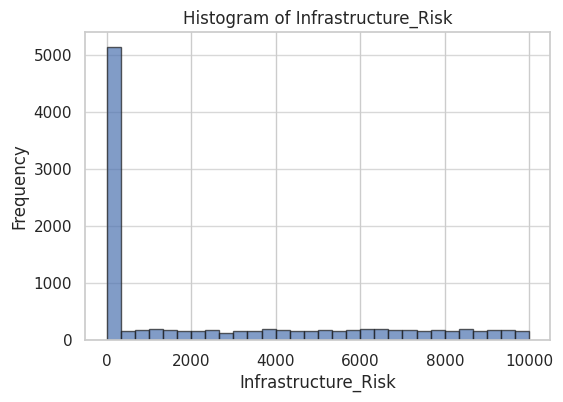

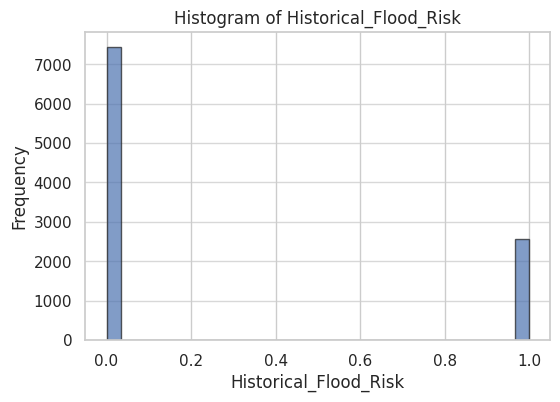

In [53]:
import matplotlib.pyplot as plt

feature_engineered_columns = [
    "Rainfall_Humidity", "Rainfall_RiverDischarge", "Rainfall_Elevation",
    "Population_Infrastructure", "Log_PopulationDensity", "Log_RiverDischarge",
    "Log_WaterLevel", "Log_Elevation", "Flood_Vulnerability_Index",
    "Infrastructure_Risk", "Historical_Flood_Risk"
]

for col in feature_engineered_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df_fe[col], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', alpha=0.75)
    plt.show()


In [68]:
df

,Latitude,Longitude,Rainfall(mm),Temperature,Humidity,RiverDischarge,WaterLevel,Elevation,LandCover,SoilType,PopulationDensity,Infrastructure,HistoricalFloods,FloodOccurred,FloodCategory,land_flag,soil_flag
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,5,5,7276.742184,1,0,1,Banjir,Water Body,Clay
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,2,3,6897.736956,0,1,0,Banjir,Forest,Peaty
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,3,2,4361.518494,1,1,1,Banjir,Agricultural,Loam
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,1,1,6163.069701,1,1,0,Banjir,Desert,Sandy
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,3,2,6167.964591,1,0,0,Banjir,Agricultural,Loam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32.872024,93.434120,285.682635,37.621017,69.795616,4830.703665,5.943965,2850.197900,3,5,6943.559433,0,0,0,Banjir,Agricultural,Clay
9996,34.027756,69.357605,224.347263,37.935808,38.095486,1866.199787,9.466158,3314.692947,2,5,3011.997459,1,0,0,Banjir,Forest,Clay
9997,35.454530,76.807256,5.836759,23.087083,79.919607,1523.374305,9.209185,3377.296962,1,5,7149.938303,1,0,1,Tidak Banjir,Desert,Clay
9998,19.527152,80.856280,120.301453,28.029593,61.680873,2036.812638,2.004644,1146.986151,5,1,906.031452,1,0,1,Banjir,Water Body,Sandy


In [55]:
# Menghapus 3 kolom yang disebutkan: 'FloodCategory', 'land_flag', dan 'soil_flag'
# df_fe = df_fe.drop(columns=["FloodCategory", "land_flag", "soil_flag"])
df = df.drop(columns=["FloodCategory", "land_flag", "soil_flag"])

# Menampilkan dataset setelah penghapusan kolom
df


,Latitude,Longitude,Rainfall(mm),Temperature,Humidity,RiverDischarge,WaterLevel,Elevation,LandCover,SoilType,...,Rainfall_RiverDischarge,Rainfall_Elevation,Population_Infrastructure,Log_PopulationDensity,Log_RiverDischarge,Log_WaterLevel,Log_Elevation,Flood_Vulnerability_Index,Infrastructure_Risk,Historical_Flood_Risk
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,4,4,...,9.277219e+05,0.578651,7276.742184,8.892576,8.351654,2.130081,5.936125,483.737246,7276.742184,0
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,1,2,...,1.368665e+05,0.007550,0.000000,8.839094,7.813424,2.283506,8.899950,-456.381638,0.000000,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,2,1,...,1.016342e+05,0.047122,4361.518494,8.380805,6.885845,1.728429,7.699332,-74.309673,4361.518494,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,0,0,...,7.329004e+05,0.079173,6163.069701,8.726493,8.211811,1.358869,7.829343,204.155885,6163.069701,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,2,1,...,3.027604e+05,0.072212,6167.964591,8.727286,7.647018,1.432334,7.602311,74.904113,6167.964591,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32.872024,93.434120,285.682635,37.621017,69.795616,4830.703665,5.943965,2850.197900,2,4,...,1.380048e+06,0.100197,0.000000,8.845714,8.482954,1.937873,7.955495,327.471547,0.000000,0
9996,34.027756,69.357605,224.347263,37.935808,38.095486,1866.199787,9.466158,3314.692947,1,4,...,4.186768e+05,0.067662,3011.997459,8.010691,7.532195,2.348147,8.106422,-45.598082,3011.997459,0
9997,35.454530,76.807256,5.836759,23.087083,79.919607,1523.374305,9.209185,3377.296962,0,4,...,8.891568e+03,0.001728,7149.938303,8.874999,7.329339,2.323288,8.125127,-165.231804,7149.938303,0
9998,19.527152,80.856280,120.301453,28.029593,61.680873,2036.812638,2.004644,1146.986151,4,0,...,2.450315e+05,0.104793,906.031452,6.810177,7.619632,1.100159,7.045765,149.840333,906.031452,0


# Cek Dataset

In [56]:
# Cek apakah dataset telah dimuat dengan benar dan tampilkan informasi dataset
# df_fe.info()
df.info()

# Cek apakah ada nilai NaN dalam dataset
# missing_values = df_fe.isnull().sum()
missing_values = df.isnull().sum()


# Cek apakah ada kolom non-numerik dalam dataset
# non_numeric_columns = df_fe.select_dtypes(exclude=[np.number]).columns.tolist()
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()


# Menampilkan hasil analisis
missing_values, non_numeric_columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Latitude                   10000 non-null  float64
 1   Longitude                  10000 non-null  float64
 2   Rainfall(mm)               10000 non-null  float64
 3   Temperature                10000 non-null  float64
 4   Humidity                   10000 non-null  float64
 5   RiverDischarge             10000 non-null  float64
 6   WaterLevel                 10000 non-null  float64
 7   Elevation                  10000 non-null  float64
 8   LandCover                  10000 non-null  int64  
 9   SoilType                   10000 non-null  int64  
 10  PopulationDensity          10000 non-null  float64
 11  Infrastructure             10000 non-null  int64  
 12  HistoricalFloods           10000 non-null  int64  
 13  FloodOccurred              10000 non-null  int6

(Latitude                     0
 Longitude                    0
 Rainfall(mm)                 0
 Temperature                  0
 Humidity                     0
 RiverDischarge               0
 WaterLevel                   0
 Elevation                    0
 LandCover                    0
 SoilType                     0
 PopulationDensity            0
 Infrastructure               0
 HistoricalFloods             0
 FloodOccurred                0
 Rainfall_Humidity            0
 Rainfall_RiverDischarge      0
 Rainfall_Elevation           0
 Population_Infrastructure    0
 Log_PopulationDensity        0
 Log_RiverDischarge           0
 Log_WaterLevel               0
 Log_Elevation                0
 Flood_Vulnerability_Index    0
 Infrastructure_Risk          0
 Historical_Flood_Risk        0
 dtype: int64,
 [])

# Modelling



In [57]:
# df_fe
df

,Latitude,Longitude,Rainfall(mm),Temperature,Humidity,RiverDischarge,WaterLevel,Elevation,LandCover,SoilType,...,Rainfall_RiverDischarge,Rainfall_Elevation,Population_Infrastructure,Log_PopulationDensity,Log_RiverDischarge,Log_WaterLevel,Log_Elevation,Flood_Vulnerability_Index,Infrastructure_Risk,Historical_Flood_Risk
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,4,4,...,9.277219e+05,0.578651,7276.742184,8.892576,8.351654,2.130081,5.936125,483.737246,7276.742184,0
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,1,2,...,1.368665e+05,0.007550,0.000000,8.839094,7.813424,2.283506,8.899950,-456.381638,0.000000,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,2,1,...,1.016342e+05,0.047122,4361.518494,8.380805,6.885845,1.728429,7.699332,-74.309673,4361.518494,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,0,0,...,7.329004e+05,0.079173,6163.069701,8.726493,8.211811,1.358869,7.829343,204.155885,6163.069701,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,2,1,...,3.027604e+05,0.072212,6167.964591,8.727286,7.647018,1.432334,7.602311,74.904113,6167.964591,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32.872024,93.434120,285.682635,37.621017,69.795616,4830.703665,5.943965,2850.197900,2,4,...,1.380048e+06,0.100197,0.000000,8.845714,8.482954,1.937873,7.955495,327.471547,0.000000,0
9996,34.027756,69.357605,224.347263,37.935808,38.095486,1866.199787,9.466158,3314.692947,1,4,...,4.186768e+05,0.067662,3011.997459,8.010691,7.532195,2.348147,8.106422,-45.598082,3011.997459,0
9997,35.454530,76.807256,5.836759,23.087083,79.919607,1523.374305,9.209185,3377.296962,0,4,...,8.891568e+03,0.001728,7149.938303,8.874999,7.329339,2.323288,8.125127,-165.231804,7149.938303,0
9998,19.527152,80.856280,120.301453,28.029593,61.680873,2036.812638,2.004644,1146.986151,4,0,...,2.450315e+05,0.104793,906.031452,6.810177,7.619632,1.100159,7.045765,149.840333,906.031452,0


In [58]:
# Memilih fitur dan target
# X = df_fe.drop(columns=["FloodOccurred"], errors="ignore")  # Fitur
# y = df_fe["FloodOccurred"]  # Target

X = df.drop(columns=["FloodOccurred"], errors="ignore")  # Fitur
y = df["FloodOccurred"]  # Target

# Membagi dataset menjadi training (80%) dan testing (0%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Random Forest

In [59]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Asumsi: df_fe sudah tersedia setelah proses cleaning


# Inisialisasi dan pelatihan model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Memprediksi hasil
y_pred = rf_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.7590

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.84      0.77      1450
           1       0.82      0.69      0.75      1550

    accuracy                           0.76      3000
   macro avg       0.77      0.76      0.76      3000
weighted avg       0.77      0.76      0.76      3000



# 2. Logistic Regression

In [60]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# # Memilih fitur dan target
# X = df_fe.drop(columns=["FloodOccurred"], errors="ignore")  # Fitur
# y = df_fe["FloodOccurred"]  # Target

# # # Membagi dataset menjadi training (80%) dan testing (20%)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi dan pelatihan model Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

# Memprediksi hasil
y_pred = log_reg_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.5577

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.53      0.53      1450
           1       0.57      0.59      0.58      1550

    accuracy                           0.56      3000
   macro avg       0.56      0.56      0.56      3000
weighted avg       0.56      0.56      0.56      3000



# 3. XGBOOST

In [61]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# # Memuat ulang dataset
# file_path = "/mnt/data/df_fe.csv"
# df_fe = pd.read_csv(file_path)

# # Menghapus kolom yang tidak diperlukan
# df_fe = df_fe.drop(columns=["FloodCategory", "land_flag", "soil_flag"], errors="ignore")

# # Memilih fitur dan target
# X = df_fe.drop(columns=["FloodOccurred"], errors="ignore")  # Fitur
# y = df_fe["FloodOccurred"]  # Target

# # Membagi dataset menjadi training (80%) dan testing (20%)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi dan pelatihan model XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Memprediksi hasil
y_pred = xgb_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.7550

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.75      1450
           1       0.76      0.77      0.76      1550

    accuracy                           0.76      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.76      0.75      3000



# 4. SVM

In [62]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# # Memuat ulang dataset
# file_path = "/mnt/data/df_fe.csv"
# df_fe = pd.read_csv(file_path)

# # Menghapus kolom yang tidak diperlukan
# df_fe = df_fe.drop(columns=["FloodCategory", "land_flag", "soil_flag"], errors="ignore")

# # Memilih fitur dan target
# X = df_fe.drop(columns=["FloodOccurred"], errors="ignore")  # Fitur
# y = df_fe["FloodOccurred"]  # Target

# # Membagi dataset menjadi training (80%) dan testing (20%)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi dan pelatihan model Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Memprediksi hasil
y_pred = svm_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.5097

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.36      0.42      1450
           1       0.52      0.65      0.58      1550

    accuracy                           0.51      3000
   macro avg       0.51      0.50      0.50      3000
weighted avg       0.51      0.51      0.50      3000



# 5. Gradient Boosting

In [63]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# # Memuat ulang dataset
# file_path = "/mnt/data/df_fe.csv"
# df_fe = pd.read_csv(file_path)

# # Menghapus kolom yang tidak diperlukan
# df_fe = df_fe.drop(columns=["FloodCategory", "land_flag", "soil_flag"], errors="ignore")

# # Memilih fitur dan target
# X = df_fe.drop(columns=["FloodOccurred"], errors="ignore")  # Fitur
# y = df_fe["FloodOccurred"]  # Target

# # Membagi dataset menjadi training (80%) dan testing (20%)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi dan pelatihan model Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Memprediksi hasil
y_pred = gb_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.7510

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.80      0.76      1450
           1       0.79      0.71      0.75      1550

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000



# METODE DIAJUKAN

In [64]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Handling class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
svc = SVC(probability=True, random_state=42)
log_reg = LogisticRegression(random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('xgb', xgb),
    ('svc', svc),
    ('log_reg', log_reg),
    ('gb', gb)
], voting='soft')

# Train and evaluate models
models = {'Random Forest': rf, 'XGBoost': xgb, 'SVM': svc, 'Logistic Regression': log_reg, 'Gradient Boosting': gb}
results = {}

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')

# Train and evaluate Voting Classifier
voting_clf.fit(X_train_smote, y_train_smote)
y_pred_voting = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f'Voting Classifier Accuracy: {voting_accuracy * 100:.2f}%')


Random Forest Accuracy: 73.57%
XGBoost Accuracy: 73.83%
SVM Accuracy: 51.80%
Logistic Regression Accuracy: 51.33%
Gradient Boosting Accuracy: 73.53%
Voting Classifier Accuracy: 73.70%


In [65]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Load data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Handling class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
svc = SVC(probability=True, random_state=42)
log_reg = LogisticRegression(random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('xgb', xgb),
    ('svc', svc),
    ('log_reg', log_reg),
    ('gb', gb)
], voting='soft')

# Train and evaluate models
models = {'Random Forest': rf, 'XGBoost': xgb, 'SVM': svc, 'Logistic Regression': log_reg, 'Gradient Boosting': gb}
results = {}

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')
    print(f'Classification Report for {name}:\n{classification_report(y_test, y_pred)}')

# Train and evaluate Voting Classifier
voting_clf.fit(X_train_smote, y_train_smote)
y_pred_voting = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f'Voting Classifier Accuracy: {voting_accuracy * 100:.2f}%')
print(f'Classification Report for Voting Classifier:\n{classification_report(y_test, y_pred_voting)}')


Random Forest Accuracy: 73.57%
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.69      0.85      0.76      1483
           1       0.81      0.63      0.71      1517

    accuracy                           0.74      3000
   macro avg       0.75      0.74      0.73      3000
weighted avg       0.75      0.74      0.73      3000

XGBoost Accuracy: 73.83%
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1483
           1       0.75      0.72      0.73      1517

    accuracy                           0.74      3000
   macro avg       0.74      0.74      0.74      3000
weighted avg       0.74      0.74      0.74      3000

SVM Accuracy: 51.80%
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.52      0.43      0.47      1483
           1       0.52      0.61      0.56      1517

In [67]:
# from google.colab import files

# # Simpan DataFrame ke file CSV
# df_fe.to_csv("df_fe.csv", index=False)

# # Download file ke komputer
# files.download("df_fe.csv")